The following objects are masked from engine (pos = 3):

    size, wear

The following objects are masked from engine (pos = 4):

    size, wear



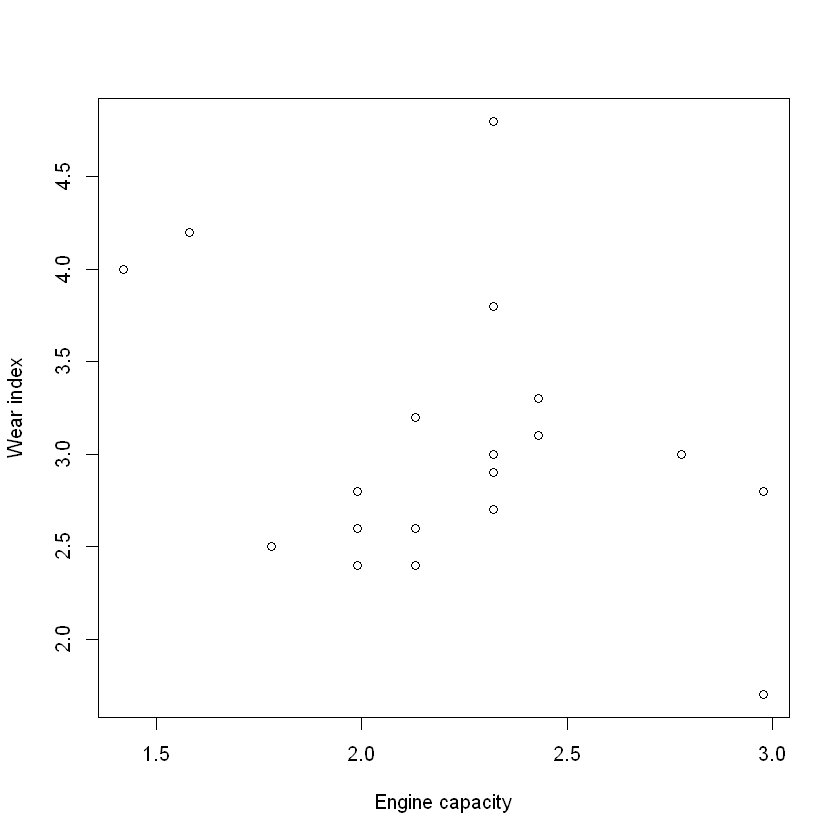

In [14]:
require(gamair)
data(engine)
attach(engine)
plot(size, wear, xlab="Engine capacity", ylab="Wear index")

In [15]:
tf <- function(x, xj, j){
    ## generate the jth tent function from set defined by knots xj
    dj <- xj*0
    dj[j] <- 1
    approx(xj, dj, x)$y
}

In [16]:
tf.X <- function(x, xj){
    ## tent function basis matrix given data x
    ## and knot sequence xj
    nk <- length(xj)
    n <- length(x)
    X <- matrix(NA, n, nk)
    for (j in 1:nk) X[,j] <- tf(x, xj, j)
    X
}

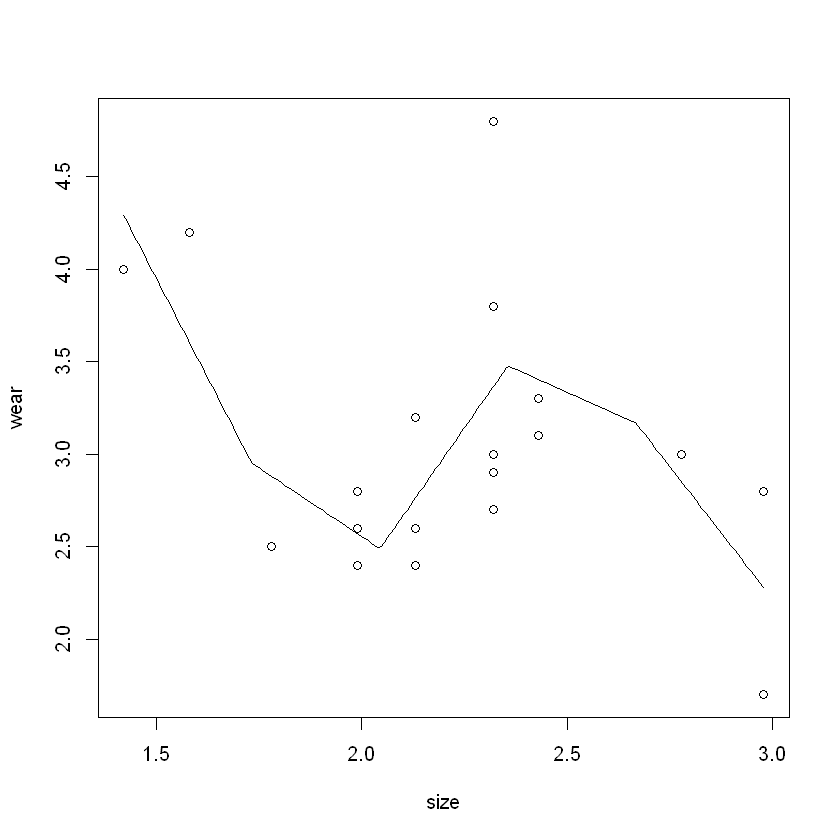

In [18]:
sj <- seq(min(size), max(size), length=6) # generate knots
X <- tf.X(size, sj) # get model matrix
b <- lm(wear ~ X - 1) # git model 
s <- seq(min(size), max(size), length=200) #prediction data
Xp <- tf.X(s, sj) # prediction matrix
plot(size, wear) # plot data overlay
lines(s, Xp %*% coef(b)) # estimated f